### <div align="center">***DATA CLEANING AND EDA***</div>

### ***Import libraries and modules***

In [174]:
# Import required libraries

import os
import numpy as np
import pandas as pd
from pathlib import Path

import squarify
import seaborn as sns 
import matplotlib.pyplot as plt

from itertools import combinations
from scipy.stats import pearsonr, spearmanr, f_oneway, chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# import warnings
# warnings.filterwarnings('ignore')

### ***Data Loading and exploration***

In [175]:
# Get data path
BASE_DIR = Path.cwd().parent 
data_path = BASE_DIR / "Data" / "Raw" / "amazon_delivery.csv"

# Load dataset
data = pd.read_csv(data_path)
print("Data loaded successfully")

Data loaded successfully


In [176]:
# View top 5 rows of the dataset 
data.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [177]:
# View bottom 5 rows of the dataset 
data.tail()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen
43738,nsyz997960170,23,4.9,23.351058,85.325731,23.431058,85.405731,2022-03-02,17:10:00,17:15:00,Fog,Medium,scooter,Metropolitian,180,Cosmetics


In [178]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [179]:
# No. of rows & columns in the dataset
print(f'No. of rows in the dataset: {data.shape[0]}')
print(f'No. of columns in the dataset: {data.shape[1]}')

No. of rows in the dataset: 43739
No. of columns in the dataset: 16


In [180]:
# No. of duplicates in the dataset
print(f'No. of duplicate rows found in the dataset: {data.duplicated().sum()}')

No. of duplicate rows found in the dataset: 0


In [181]:
# No. of missing values in the dataset
def missing_values(df):

    total_rows = df.shape[0]
    missing_rows = df.isnull().sum().sum()
    non_missing_rows = total_rows - missing_rows

    print(f'Total no. of rows in dataset: {total_rows}')
    print(f'Total no. of missing rows in dataset: {missing_rows}')
    print(f'Total no. of non-missing rows in dataset: {non_missing_rows}\n')

    missing_count = df.isnull().sum()
    missing_percent = 100 * df.isnull().sum() / len(df)
    
    summary = pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage': missing_percent.round(2)
    })
    
    print('Missing Data summary:')
    summary = summary[summary['Missing Values'] > 0]
    return summary.sort_values(by='Percentage', ascending=False)

summary = missing_values(data)
print(summary)

Total no. of rows in dataset: 43739
Total no. of missing rows in dataset: 145
Total no. of non-missing rows in dataset: 43594

Missing Data summary:
              Missing Values  Percentage
Weather                   91        0.21
Agent_Rating              54        0.12


In [182]:
# Descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Agent_Age,43739.0,29.567137,5.815155,15.000000,25.000000,30.000000,35.000000,50.000000
Agent_Rating,43685.0,4.633780,0.334716,1.000000,4.500000,4.700000,4.900000,6.000000
Store_Latitude,43739.0,17.210960,7.764225,-30.902872,12.933298,18.551440,22.732225,30.914057
Store_Longitude,43739.0,70.661177,21.475005,-88.366217,73.170283,75.898497,78.045359,88.433452
Drop_Latitude,43739.0,17.459031,7.342950,0.010000,12.985996,18.633626,22.785049,31.054057
Drop_Longitude,43739.0,70.821842,21.153148,0.010000,73.280000,76.002574,78.104095,88.563452
Delivery_Time,43739.0,124.905645,51.915451,10.000000,90.000000,125.000000,160.000000,270.000000


In [183]:
data.describe(include='object').T

,count,unique,top,freq
Order_ID,43739,43739,ialx566343618,1
Order_Date,43739,44,2022-03-15,1141
Order_Time,43739,177,21:55:00,460
Pickup_Time,43739,193,21:30:00,481
Weather,43648,6,Fog,7440
Traffic,43739,5,Low,14999
Vehicle,43739,4,motorcycle,25527
Area,43739,4,Metropolitian,32698
Category,43739,16,Electronics,2849


In [184]:
data.nunique()

Order_ID           43739
Agent_Age             22
Agent_Rating          28
Store_Latitude       521
Store_Longitude      415
Drop_Latitude       4367
Drop_Longitude      4367
Order_Date            44
Order_Time           177
Pickup_Time          193
Weather                6
Traffic                5
Vehicle                4
Area                   4
Delivery_Time         89
Category              16
dtype: int64

#### <div align="center">***Dataset Understanding***</div>
---

- ***The dataset contains detailed information about e-commerce deliveries*** (order details, delivery agent demographics, geographic coordinates, timestamps, & contextual factors such as traffic, weather, and area type).
- The dataset consists of ***43739 rows*** & ***16 columns***. 
- The ***target variable*** is ***Delivery_Time*** (in hours), which represents the actual time taken to complete a delivery.
- It is a ***fairly clean dataset*** with ***no duplicate values*** and ***only 0.33% missing values*** overall (Weather = 91, Agent_Rating = 54).
- ***Some columns need data type conversion*** (dates and times should be converted to datetime).

#### <div align="center">***Variable Understanding***</div>
---
***Numerical variables: 7***

- ***Agent_Age:*** 
  - Age of the delivery agent.
  - Values range from 15-50, with most agents in their 25s-35s. 
  - Distribution appears normal with no extreme outliers.
  
- ***Agent_Rating:*** 
  - Rating of the delivery agent.
  - Values range from 1–6 (though expected to be on a 1–5 scale). 
  - Distribution skews towards higher ratings, suggesting most agents are rated positively.
  - There are 54 missing values and the value 6 may indicate a data entry anomaly which needs cleaning or capping. 
  
- ***Store_Latitude/Longitude:*** 
  - Geographic location of the store.
  - Appears consistent with no obvious invalid coordinates.
  
- ***Drop_Latitude/Longitude:*** 
  - Geographic location of the delivery address.
  - Appears consistent with no obvious invalid coordinates.
  - Useful for calculating distances.
  
- ***Delivery_Time:*** **Target variable** 
  - Represents the actual time taken for delivery (in hours).
  - Ranges from 10-270 hours, ost deliveries are completed within 4–11 days, though a few extreme long deliveries exist (up to ~11 days).
  - Distribution shows right skew → a few long deliveries (possible outliers).
---
***Categorical vaariables: 9***

- ***Order_ID:*** 
  - Unique identifier for each order.
  - No duplicates observed. Can be dropped as it is purely an identifier column.
  
- ***Order_Date/Order_Time:*** 
  - Date and time when the order was placed. Both are of object data types.
  - Convert to datetime format & extract time-based features (day of week, hour, etc).
  
- ***Pickup_Time:*** 
  - Time when the delivery agent picked up the order.
  - Object data type, convert to datetime format & use it to calculate order-to-pickup delay.

- ***Weather:*** 
  - Weather conditions during delivery.
  - Has 6 unique categories of weather with Fog being the most frequent weather type.
  - Also has 91 missing values that needs handling.
  
- ***Traffic:*** 
  - Traffic conditions during delivery.
  - Has 5 differents categories of traffic with traffic being Low most of the times.
 
- ***Vehicle:*** 
  - Mode of transportation used for delivery.
  - Has 4 differents categories of vehicle with most used transportation being motorcycle.
  
- ***Area:*** 
  - Type of delivery area (Urban/Metropolitan).
  - Has 4 differents categories of Area with most orders being delivered in a Metropolitan area.

- ***Category:*** 
  - Category of the product being delivered.
  - Has 16 different types of products being delivered with Electronics being the most delivered product.

### ***Data Cleaning***

In [185]:
# Create a copy of the dataframe
clean_data = data.copy()

In [186]:
# Handle anomalies detected in Agent_Rating 1st & then impute missing values with median

print(len(clean_data[clean_data['Agent_Rating'] > 5])) # Checks no. of anomalies 
clean_data.loc[clean_data['Agent_Rating'] > 5, 'Agent_Rating'] = 5 # Cap values > 5 to 5
clean_data['Agent_Rating'].describe().T # Check after capping

53


count    43685.000000
mean         4.632567
std          0.331560
min          1.000000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: Agent_Rating, dtype: float64

In [187]:
# Impute missing values with median
clean_data['Agent_Rating'] = clean_data['Agent_Rating'].fillna(clean_data['Agent_Rating'].median()) 
clean_data['Agent_Rating'].isnull().sum()

0

In [188]:
# Inspect rows where weather is NaN
clean_data[clean_data['Weather'].isnull()] 

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
2286,xige084493792,15,1.0,-26.891191,75.802083,26.981191,75.892083,2022-03-12,NaN,17:20:00,NaN,NaN,motorcycle,Urban,75,Home
2779,oilg311747812,15,1.0,22.750040,75.902847,22.810040,75.962847,2022-04-03,NaN,20:30:00,NaN,NaN,scooter,Metropolitian,145,Kitchen
2825,pbox816153129,15,1.0,21.149569,72.772697,21.209569,72.832697,2022-03-21,NaN,22:10:00,NaN,NaN,bicycle,Metropolitian,100,Clothing
3438,nzsa056960624,50,5.0,-12.970324,-77.645748,13.010324,77.685748,2022-03-13,NaN,12:30:00,NaN,NaN,van,Urban,125,Cosmetics
4514,eids248121351,50,5.0,-17.451976,-78.385883,17.561976,78.495883,2022-04-04,NaN,23:20:00,NaN,NaN,bicycle,Metropolitian,135,Jewelry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40359,lasg907081524,50,5.0,22.751234,75.889490,22.781234,75.919490,2022-03-17,NaN,20:40:00,NaN,NaN,scooter,Metropolitian,140,Apparel
41088,wgdm794380305,50,5.0,-12.939496,77.625999,12.949496,77.635999,2022-03-19,NaN,09:40:00,NaN,NaN,van,Metropolitian,95,Books
42598,llox673359294,15,1.0,0.000000,0.000000,0.070000,0.070000,2022-03-14,NaN,17:40:00,NaN,NaN,scooter,Metropolitian,170,Jewelry
43053,ifig993965994,15,1.0,13.086438,80.220672,13.216439,80.350672,2022-03-18,NaN,18:00:00,NaN,NaN,van,Urban,130,Jewelry


In [189]:
clean_data['Traffic'].value_counts()

Traffic
Low        14999
Jam        13725
Medium     10628
High        4296
NaN           91
Name: count, dtype: int64

- Traffic has "NaN" as string placeholders, not real missing values, which is why .isnull().sum() shows 0, but we see NaN visually when inspecting subsets.
- Let's standardized placeholder strings like "NaN", "null", "None", & blanks across all object columns by stripping whitespace & replacing them with real NaN values, ensuring pandas correctly recognizes them as missing data.

In [190]:
# Standardized placeholder strings with NaN in categorical variables
for col in clean_data.select_dtypes(include=['object']).columns:
    clean_data[col] = clean_data[col].astype(str).str.strip()
    clean_data[col] = clean_data[col].replace(
        ["NaN", "nan", "Null", "null", "None", "none", ""], np.nan
    )

In [191]:
# Drop rows where any of these columns are missing
clean_data = clean_data.dropna(subset=['Order_Time', 'Weather', 'Traffic'])

# Verify
print("Remaining rows:", clean_data.shape[0])
print(clean_data.isnull().sum())

Remaining rows: 43648
Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64


In [192]:
# Convert Date & time features to Datetime dtype
clean_data['Order_Date'] = pd.to_datetime(clean_data['Order_Date'], errors='coerce')
clean_data['Order_Time'] = pd.to_datetime(clean_data['Order_Time'], format="%H:%M:%S", errors='coerce')
clean_data['Pickup_Time'] = pd.to_datetime(clean_data['Pickup_Time'], format="%H:%M:%S", errors='coerce')

# Convert object dtypes to category to reduce memory
for col in ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']:
    clean_data[col] = clean_data[col].astype('category')

In [193]:
# Final check after handling missing values & dtype conversions
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43648 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43648 non-null  object        
 1   Agent_Age        43648 non-null  int64         
 2   Agent_Rating     43648 non-null  float64       
 3   Store_Latitude   43648 non-null  float64       
 4   Store_Longitude  43648 non-null  float64       
 5   Drop_Latitude    43648 non-null  float64       
 6   Drop_Longitude   43648 non-null  float64       
 7   Order_Date       43648 non-null  datetime64[ns]
 8   Order_Time       43648 non-null  datetime64[ns]
 9   Pickup_Time      43648 non-null  datetime64[ns]
 10  Weather          43648 non-null  category      
 11  Traffic          43648 non-null  category      
 12  Vehicle          43648 non-null  category      
 13  Area             43648 non-null  category      
 14  Delivery_Time    43648 non-null  int64     

### ***Feature Engineering***

In [194]:
# Function for feature engineering
def feature_engineering(df):
    """
    Perform feature engineering on the delivery dataset:
    - Calculate geospatial distance (Haversine formula)
    - Extract time-based features from Order_Date
    - Calculate delivery delays (pickup - order time)
    - Drop irrelevant & redundant columns
    """

    df = df.copy()

    # Distance Feature (Haversine formula)
    def haversine(lat1, lon1, lat2, lon2):
        R = 6371  # Earth radius in kilometers
        lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
        c = 2 * np.arcsin(np.sqrt(a))
        return R * c

    df['Distance_km'] = haversine(
        df['Store_Latitude'], df['Store_Longitude'],
        df['Drop_Latitude'], df['Drop_Longitude']
    )

    #Time-based Features
    df["Order_DateTime"] = df["Order_Date"].dt.date.astype(str) + " " + df["Order_Time"].dt.strftime("%H:%M:%S")
    df["Pickup_DateTime"] = df["Order_Date"].dt.date.astype(str) + " " + df["Pickup_Time"].dt.strftime("%H:%M:%S")

    df["Order_DateTime"] = pd.to_datetime(df["Order_DateTime"], errors="coerce")
    df["Pickup_DateTime"] = pd.to_datetime(df["Pickup_DateTime"], errors="coerce")

    mask = df["Pickup_DateTime"] < df["Order_DateTime"]
    df.loc[mask, "Pickup_DateTime"] += pd.Timedelta(days=1)

    df['Delay_Time'] = (df['Pickup_DateTime'] - df['Order_DateTime']) # Delivery Delay Feature
    df['Delay_Time'] = df['Delay_Time'].dt.total_seconds() / 3600

    df['Order_DayOfWeek'] = df['Order_DateTime'].dt.dayofweek # Monday=0, Sunday=6
    df['Order_Month'] = df['Order_DateTime'].dt.month
    df['Order_Day'] = df['Order_DateTime'].dt.day
    df['Is_Weekend'] = df['Order_DayOfWeek'].isin([5, 6]).astype(int)

    # Drop Irrelevant Columns
    df.drop(['Order_ID', 'Order_Date', 'Order_Time', 'Pickup_Time',
            'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude'], axis=1, inplace=True)

    return df

In [195]:
# New Feature Engineered dataset
fe_dataset = feature_engineering(clean_data)
fe_dataset.head()

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Order_DateTime,Pickup_DateTime,Delay_Time,Order_DayOfWeek,Order_Month,Order_Day,Is_Weekend
0,37,4.9,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,2022-03-19 11:30:00,2022-03-19 11:45:00,0.250000,5,3,19,1
1,34,4.5,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,2022-03-25 19:45:00,2022-03-25 19:50:00,0.083333,4,3,25,0
2,23,4.4,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,2022-03-19 08:30:00,2022-03-19 08:45:00,0.250000,5,3,19,1
3,38,4.7,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,2022-04-05 18:00:00,2022-04-05 18:10:00,0.166667,1,4,5,0
4,32,4.6,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,2022-03-26 13:30:00,2022-03-26 13:45:00,0.250000,5,3,26,1


In [196]:
fe_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43648 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Agent_Age        43648 non-null  int64         
 1   Agent_Rating     43648 non-null  float64       
 2   Weather          43648 non-null  category      
 3   Traffic          43648 non-null  category      
 4   Vehicle          43648 non-null  category      
 5   Area             43648 non-null  category      
 6   Delivery_Time    43648 non-null  int64         
 7   Category         43648 non-null  category      
 8   Distance_km      43648 non-null  float64       
 9   Order_DateTime   43648 non-null  datetime64[ns]
 10  Pickup_DateTime  43648 non-null  datetime64[ns]
 11  Delay_Time       43648 non-null  float64       
 12  Order_DayOfWeek  43648 non-null  int32         
 13  Order_Month      43648 non-null  int32         
 14  Order_Day        43648 non-null  int32     

### ***Exploratory Data Analysis***

In [197]:
# Create a folder to store analysis images
output_dir = "../Reports/Analysis_Images"
os.makedirs(output_dir, exist_ok=True)

In [198]:
# SPlit numerical & categorical columns
num_cols = fe_dataset.select_dtypes(include=['number']).columns.tolist()
cat_cols = fe_dataset.select_dtypes(include=['object', 'category']).columns.tolist()

print(f'No. of numerical features: {len(num_cols)} -> {num_cols}')
print(f'No. of categorical features: {len(cat_cols)} -> {cat_cols}')

No. of numerical features: 9 -> ['Agent_Age', 'Agent_Rating', 'Delivery_Time', 'Distance_km', 'Delay_Time', 'Order_DayOfWeek', 'Order_Month', 'Order_Day', 'Is_Weekend']
No. of categorical features: 5 -> ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']


#### ***Univariate Analysis***

##### ***Using Histograms + KDE & Boxplots for Numerical features and Countplot & Treemap for Categorical features***
- ***Reasoning:***
    - ***Histograms*** → Shows the frequency distribution of values, ***KDE*** → Smooths the histogram into a probability density curve
    - ***Boxplot*** → Summarizes distribution using the 5-number summary (min, Q1, median, Q3, max). Highlights outliers beyond whiskers.
    - ***Countplot*** → exact frequency comparison
    - ***Treemap*** → proportional representation in one glance.

In [199]:

def plot_feature_distribution(df, column, figsize=(20,5)):
    """
    Plots EDA visualizations for a given column in a dataset.

    - Numeric: Histogram + KDE, Boxplot, and summary stats
    - Categorical: Countplot + Pie chart with legend
    - Timedelta: Histogram (in hours/days), Boxplot, and summary stats
    """
    
    series = df[column].dropna()
    col_type = df[column].dtype
    
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # ---------- Numeric features ----------
    if pd.api.types.is_numeric_dtype(col_type):

        sns.histplot(series, kde=True, bins=30, ax=axes[0], color="skyblue", edgecolor="black") # Histogram with KDE
        axes[0].set_title(f"Distribution of {column}")
        
        sns.boxplot(x=series, ax=axes[1], color="lightgreen") # Boxplot
        axes[1].set_title(f"Boxplot of {column}")
        
        stats = series.describe().to_dict()
        textstr = "\n".join([f"{k}: {v:.2f}" for k,v in stats.items()])
        axes[0].text(0.95, 0.95, textstr, transform=axes[0].transAxes, fontsize=10, verticalalignment='top', 
                     horizontalalignment='right', bbox=dict(boxstyle="round", facecolor="white", alpha=0.7))
    
    # ---------- Categorical features ----------
    elif isinstance(col_type, pd.CategoricalDtype) or pd.api.types.is_object_dtype(col_type):
        
        sns.countplot(x=series, hue=series, order=series.value_counts().index, ax=axes[0], palette="Set2", legend=False) # Countplot
        axes[0].set_title(f"Countplot of {column}")
        axes[0].tick_params(axis='x', rotation=45)
        
        vc = series.value_counts()
        squarify.plot(sizes=vc.values, label=vc.index, alpha=.8, ax=axes[1], color=sns.color_palette("pastel", len(vc))) # Treemap
        axes[1].set_title(f"Treemap of {column}")
        axes[1].axis('on')
        
        # Add counts on top of bars
        for p in axes[0].patches:
            height = p.get_height()
            axes[0].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', 
                             va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])    
    plt.savefig(os.path.join(output_dir, f"{column}_distribution.png".replace(" ", "_")), dpi=300, bbox_inches="tight") # Save plot
    plt.show()

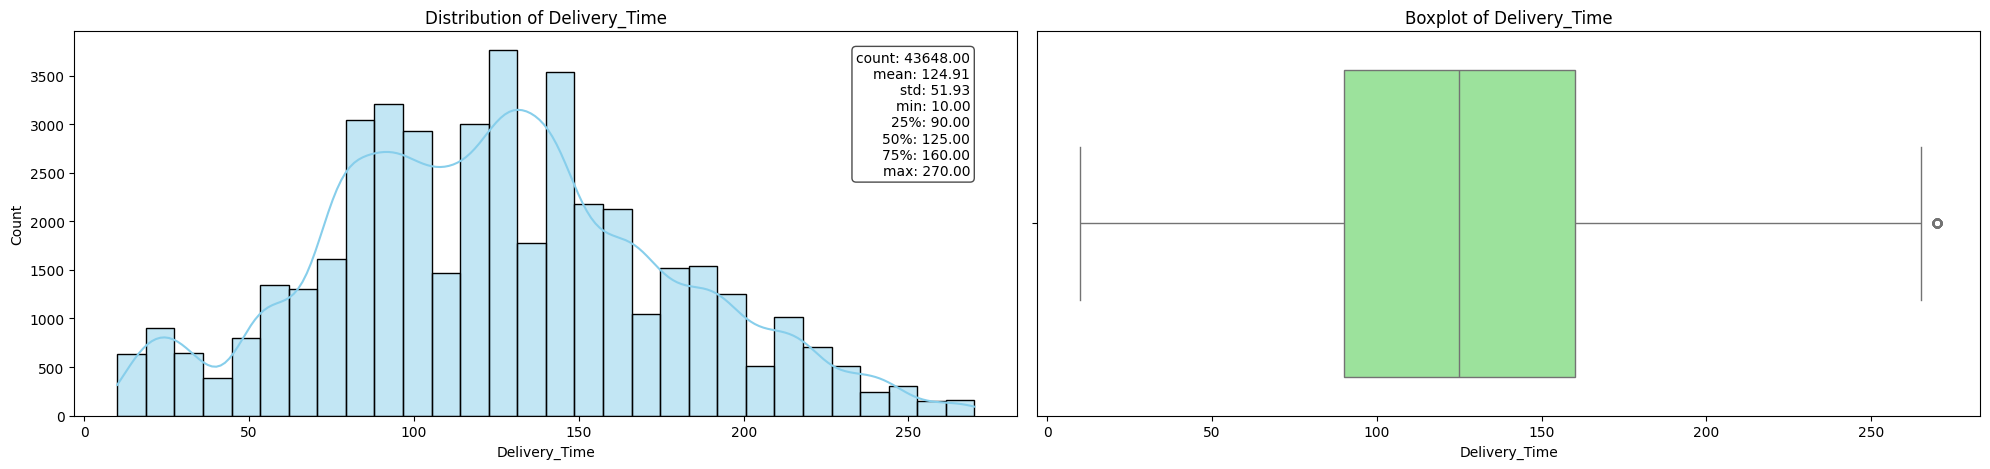

In [200]:
# Target Variable Analysis
plot_feature_distribution(fe_dataset, 'Delivery_Time')

***Delivery Time (hours) - Target Variable***

- ***Distribution:*** Right-skewed with peak around 120–150 hours.
- ***Boxplot:*** Some long-tail outliers (above 220 hours).
- ***Insight:*** Typical deliveries take about 10 hours, but extreme outliers suggest traffic/distance/weather challenges.

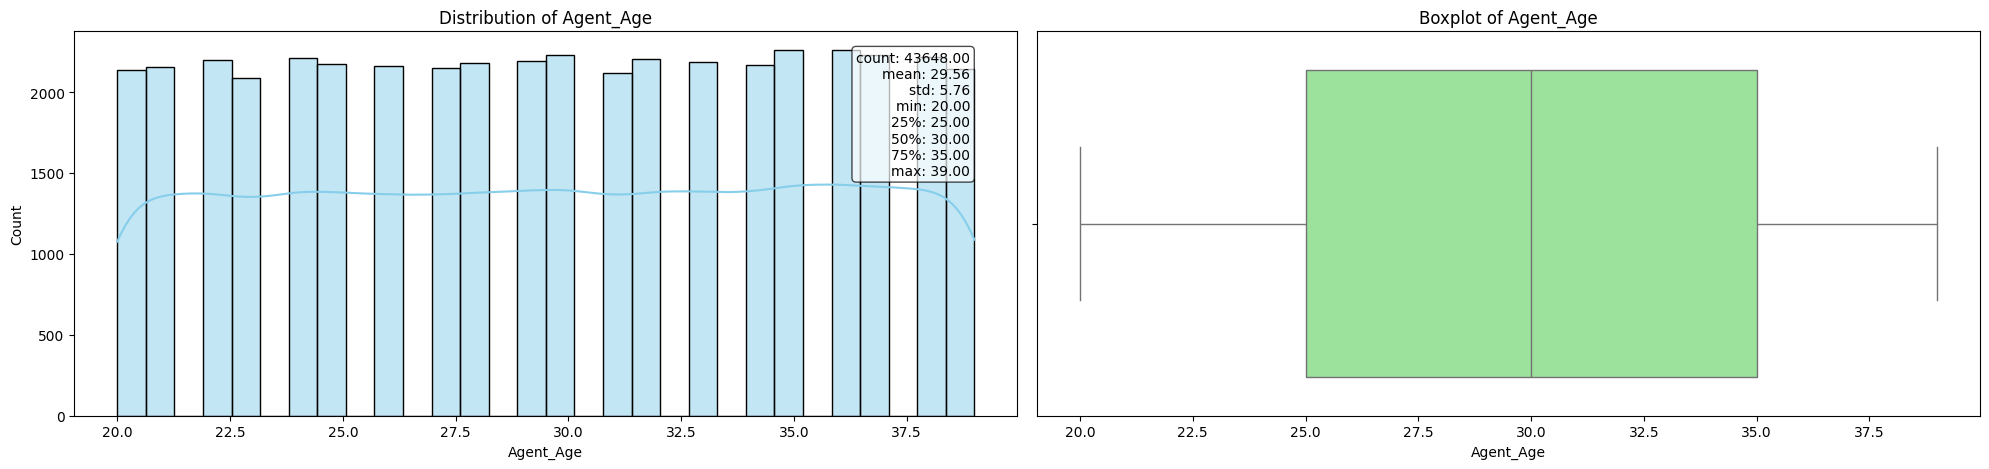

In [201]:
# Numerical features 
plot_feature_distribution(fe_dataset, 'Agent_Age')

***Agent Age***

- ***Distribution:*** Fairly uniform distribution between 20–39 years.
- ***Boxplot:*** No extreme outliers. Most agents are between 25–35 years.
- ***Insight:*** Workforce is balanced, with a concentration around 30 years, showing a relatively young delivery workforce.

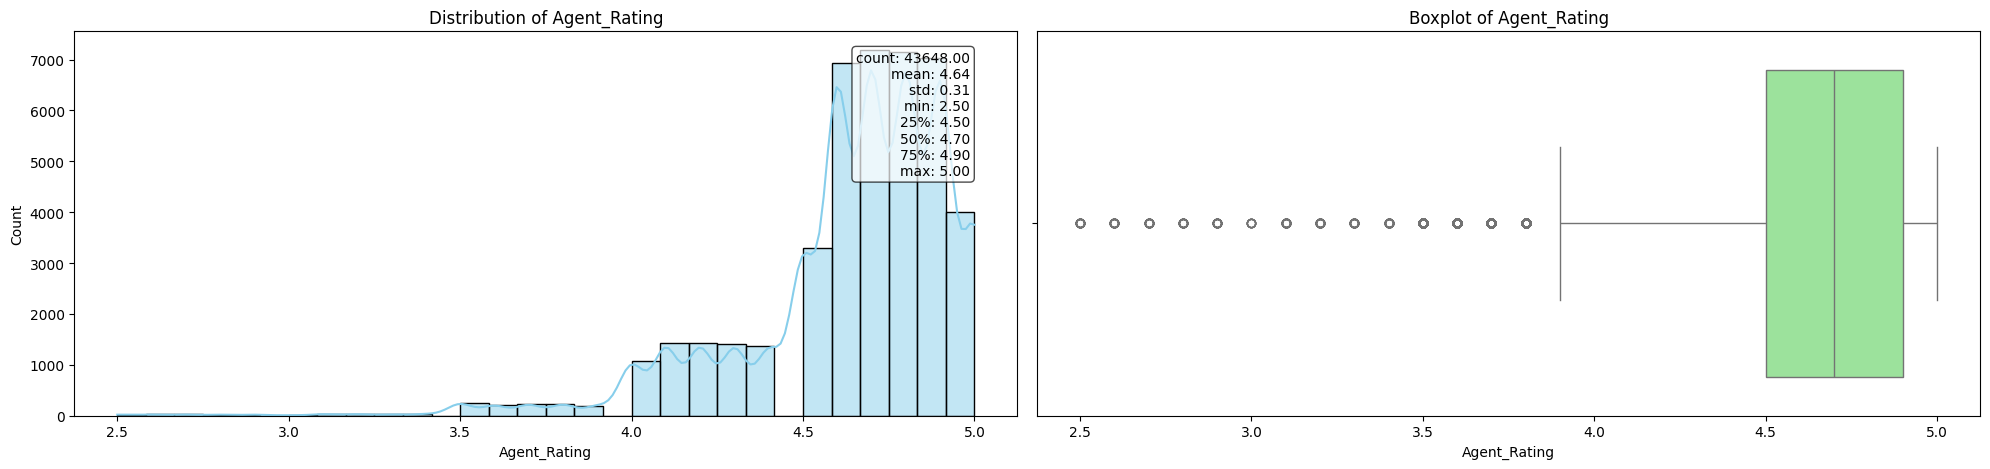

In [202]:
plot_feature_distribution(fe_dataset, 'Agent_Rating')

***Agent Rating***

- ***Distribution:*** Left-skewed, with most ratings between 4.5 and 5.0.
- ***Boxplot:*** Few outliers below 4.0, but the majority of agents perform well.
- ***Insight:*** High overall service quality, with customers rating agents positively.

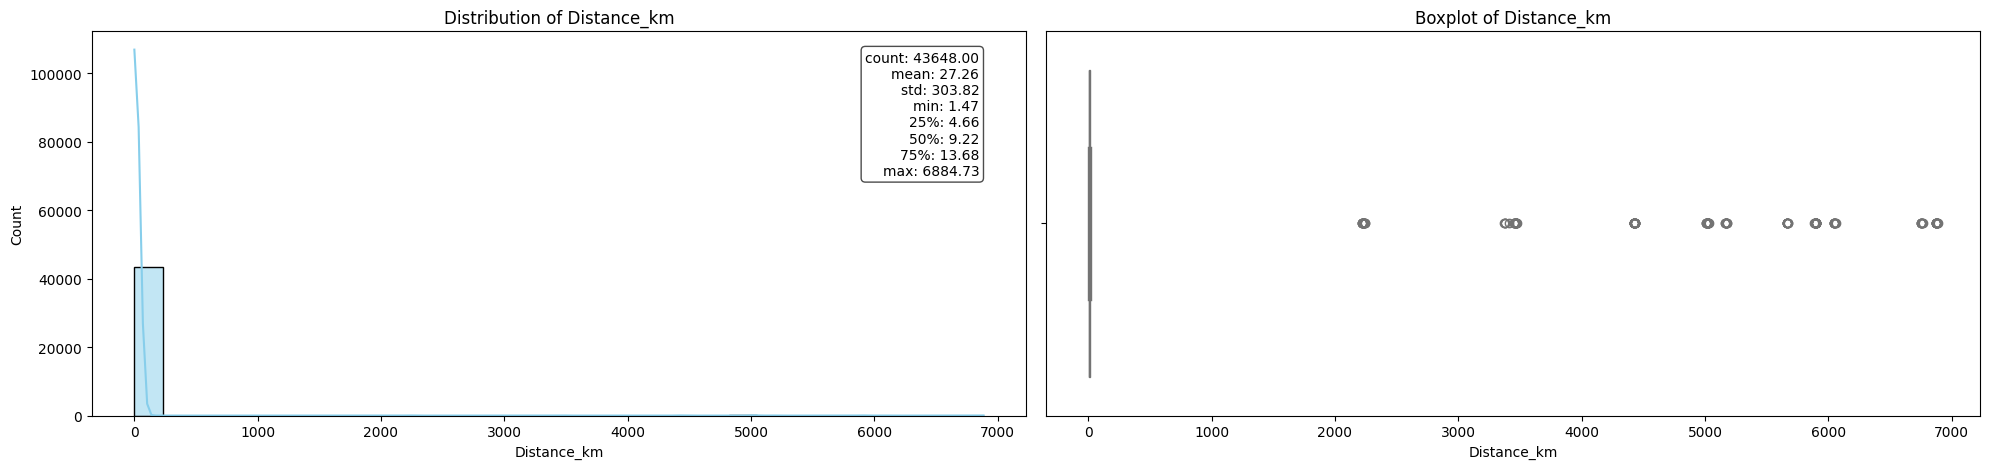

In [203]:
plot_feature_distribution(fe_dataset, "Distance_km")

***Distance (km)***

- ***Distribution:*** Strongly right-skewed with most values < 20 km, but extreme outliers up to 6800 km (likely anomalies or data entry errors).
- ***Insight:*** Most deliveries are local (short-range), but data cleaning may be required to handle unrealistic distances.

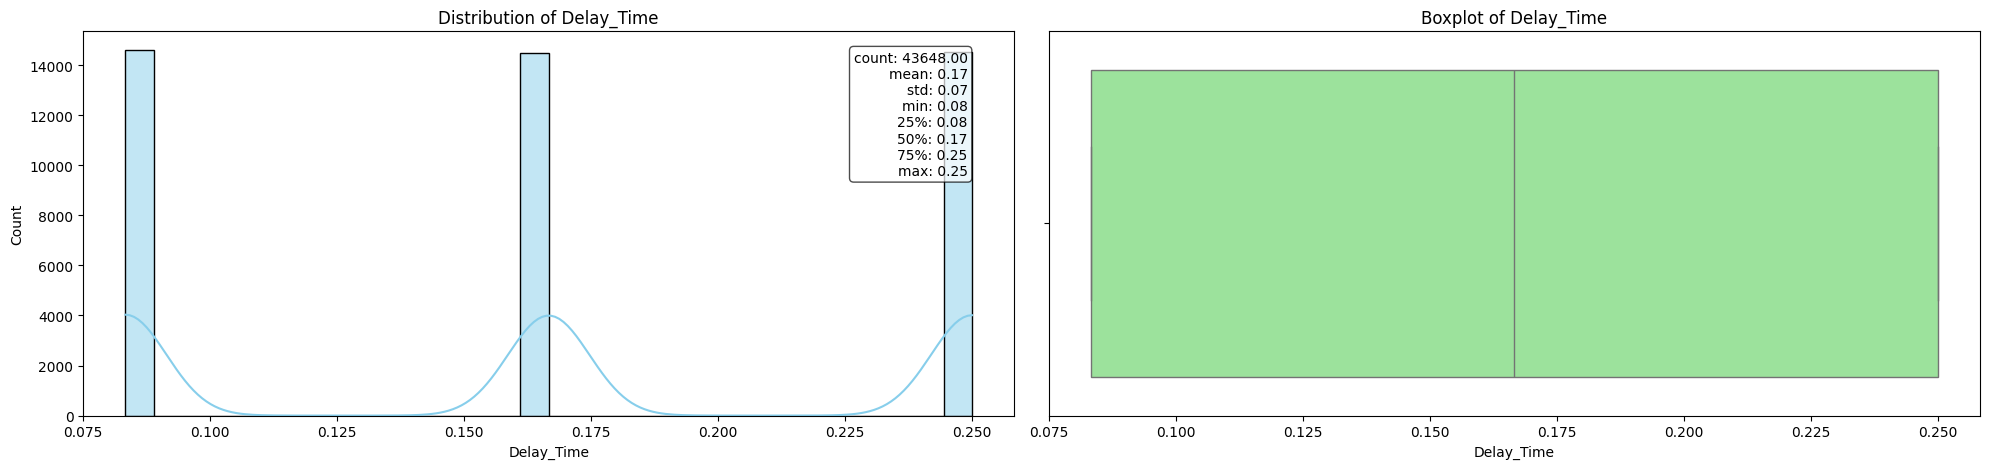

In [204]:
plot_feature_distribution(fe_dataset, 'Delay_Time')

***Delay Time (hours) - Time difference between pickup and order placement.***

- ***Distribution:*** Highly skewed with two distinct peaks at ~0.08 and ~0.25 hours.
- ***Insight:*** Most orders are picked up within 5–15 minutes, but a small subset faces longer delays (possibly operational issues).

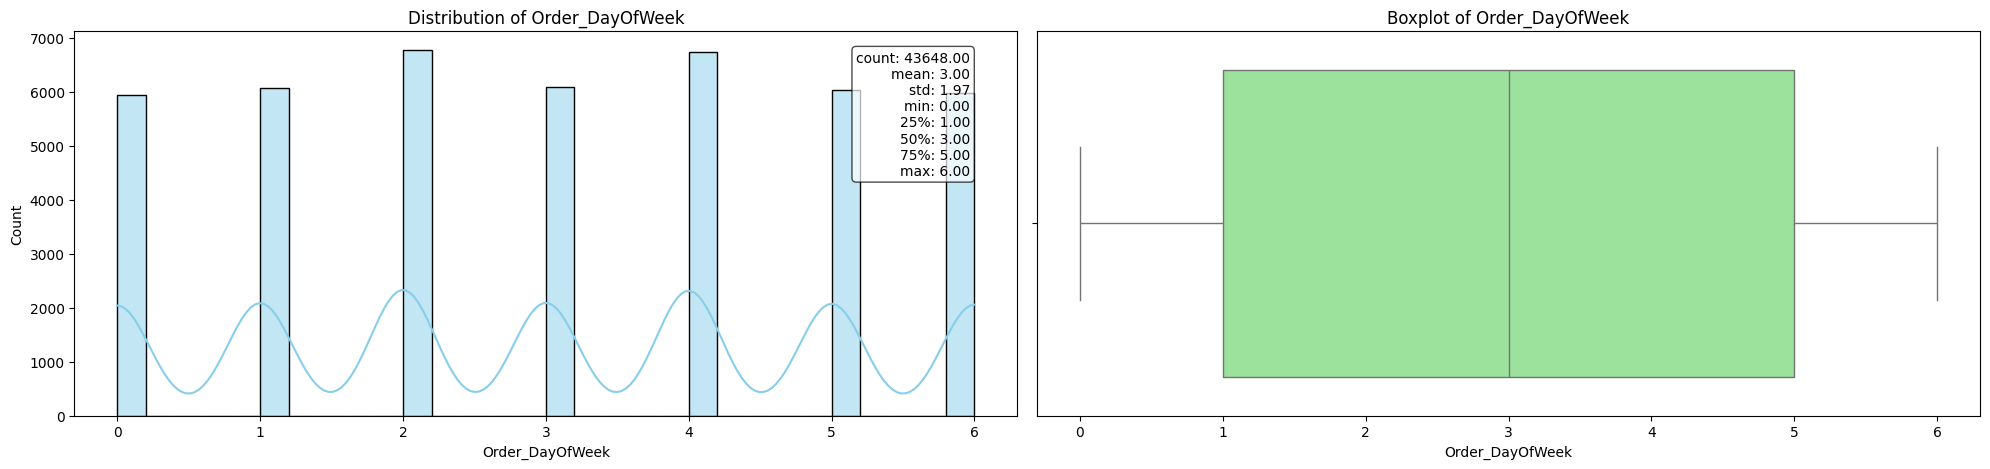

In [205]:
plot_feature_distribution(fe_dataset, 'Order_DayOfWeek')

***Order Day of Week***

- ***Distribution:*** Orders are fairly spread across the week, but peaks on Fridays and Mondays.
- ***Insight:*** Start and end of week see higher demand, possibly due to office/work schedules.

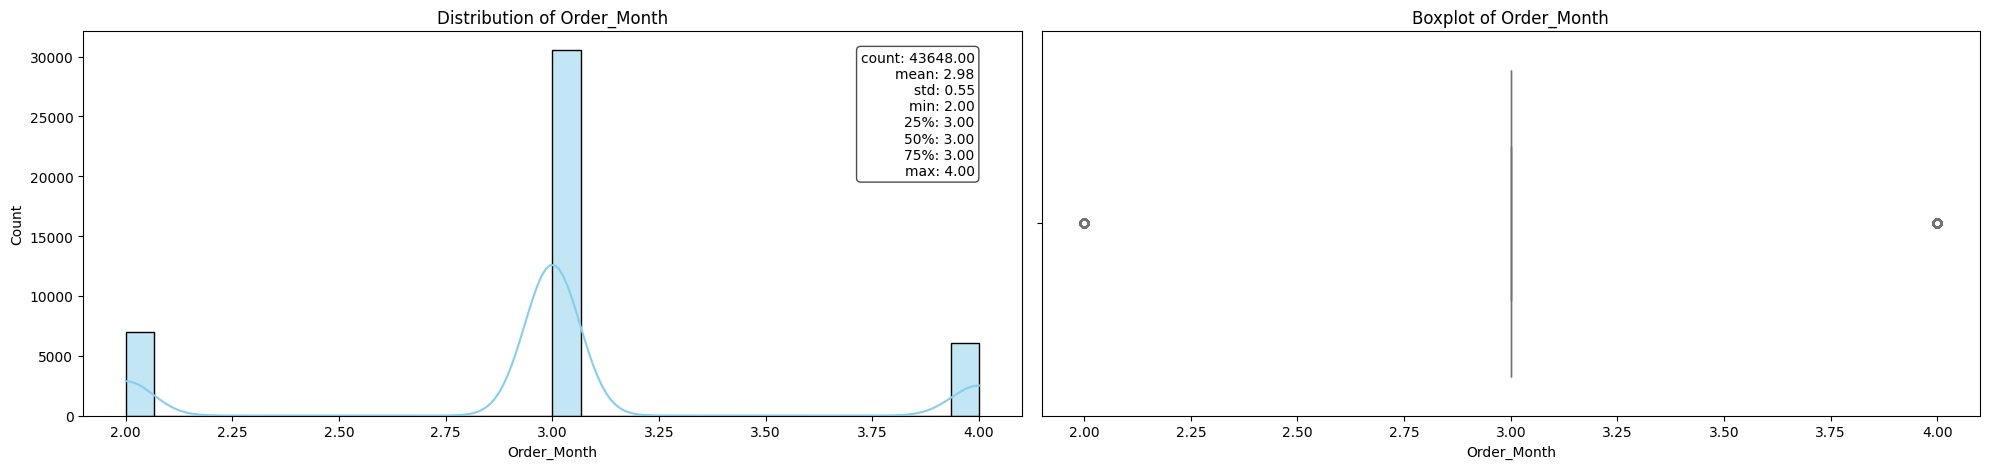

In [206]:
plot_feature_distribution(fe_dataset, 'Order_Month')

***Order Month***

- ***Distribution:*** Concentrated in March (≈70%), followed by February & April.
- ***Insight:*** Dataset covers a limited seasonal window (3 months), so seasonal patterns may not be fully captured.

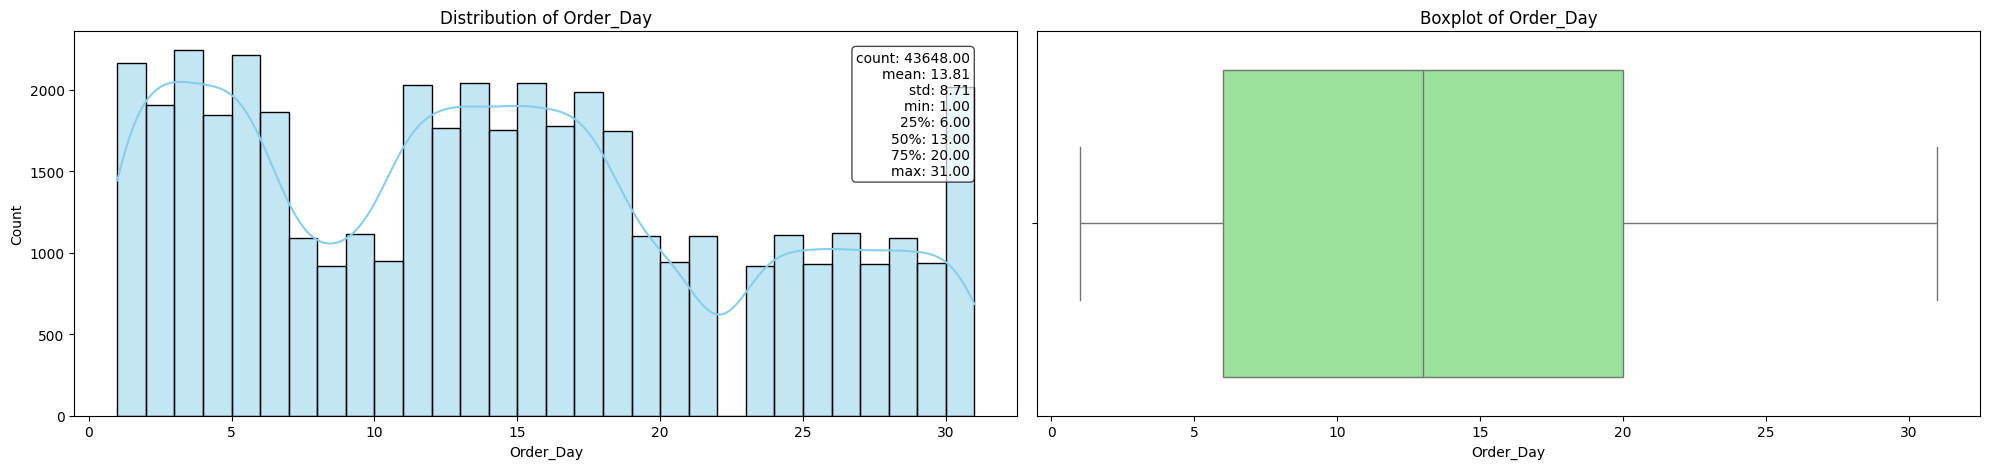

In [207]:
plot_feature_distribution(fe_dataset, 'Order_Day')

***Order Day***

- ***Distribution:*** Fairly uniform, but spikes on the 1st and mid-month (15th–16th).
- ***Insight:*** Suggests salary cycles or monthly shopping trends drive demand.


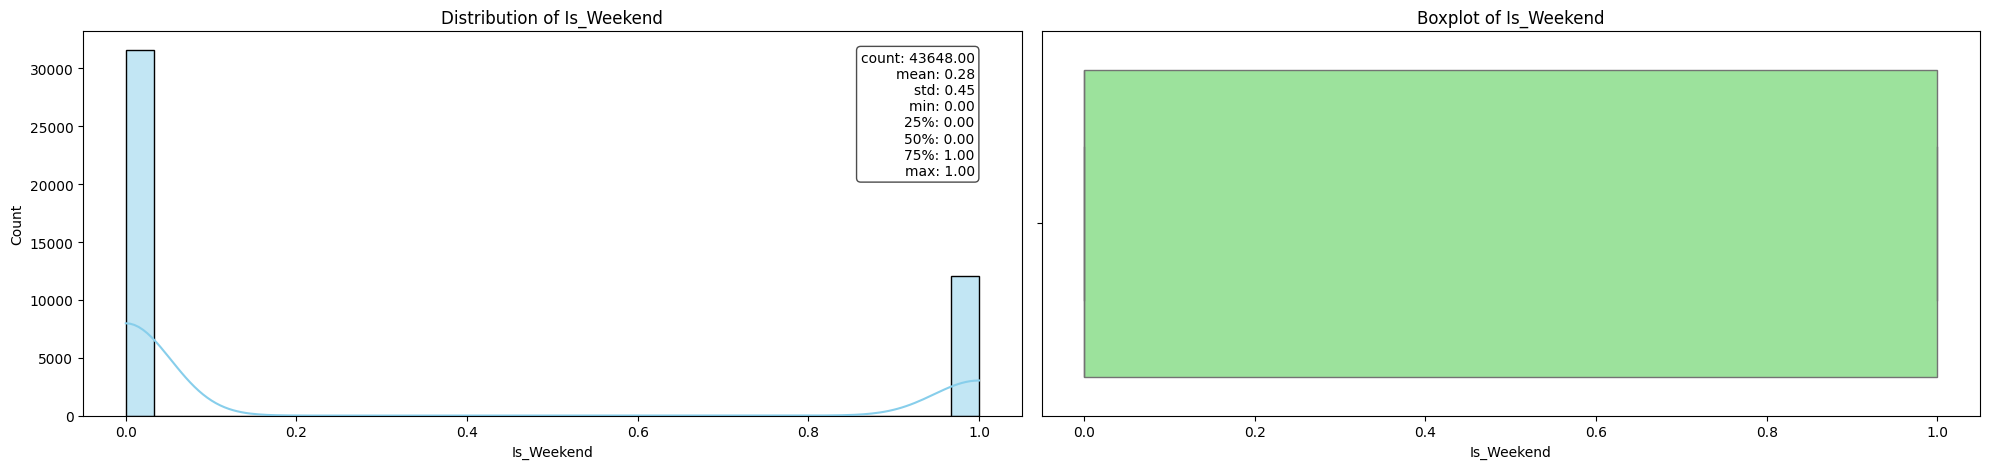

In [208]:
plot_feature_distribution(fe_dataset, 'Is_Weekend')

***Is_Weekend (0 = Weekday, 1 = Weekend)***

- ***Distribution:*** About 72% weekday orders and 28% weekend orders.
- ***Insight:*** Higher order volumes on weekdays, but weekends still represent a significant proportion (likely due to leisure shopping/food).

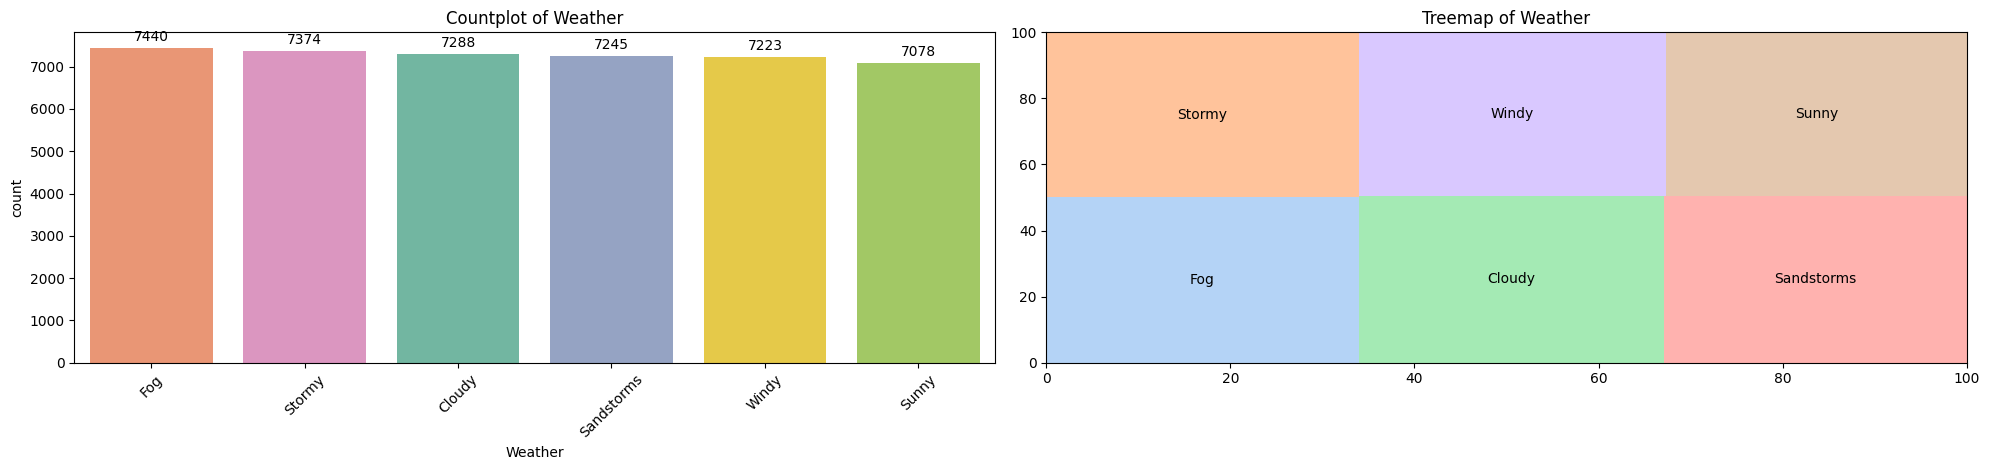

In [209]:
# Categorical features
plot_feature_distribution(fe_dataset, 'Weather')

***Weather***

- Deliveries are spread across different weather conditions, each weather type has ~7k deliveries, indicating a balanced dataset for weather conditions.
- ***Insight:*** Weather impact on delivery times can be studied reliably since no weather type dominates excessively.

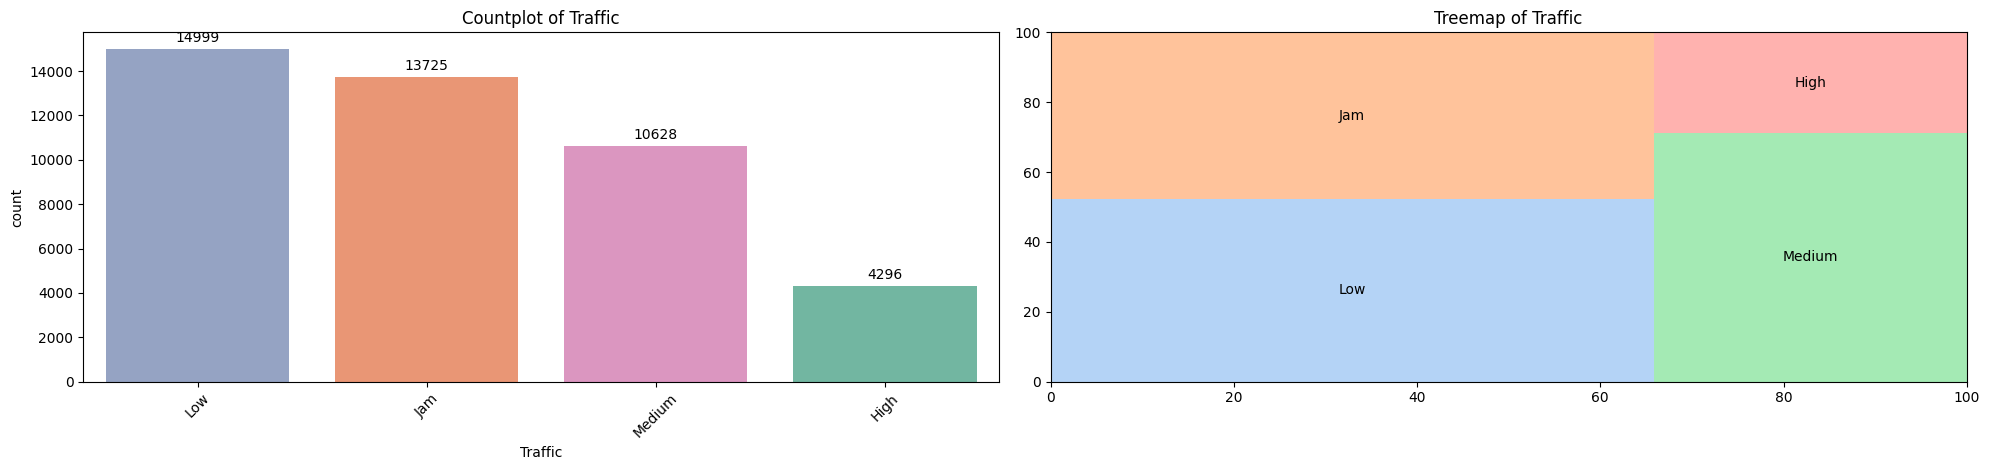

In [210]:
plot_feature_distribution(fe_dataset, 'Traffic')

***Vehicle***

- Delivery vehicles are distributed as: Motorcycle (25,519 orders, ~59%) – primary delivery mode, Scooter (14,607 orders, ~34%) – secondary delivery mode & Van (3,522 orders, ~8%) – rarely used
- ***Insight:*** Motorcycles dominate deliveries, reflecting real-world logistics where they are faster and more efficient in urban traffic.

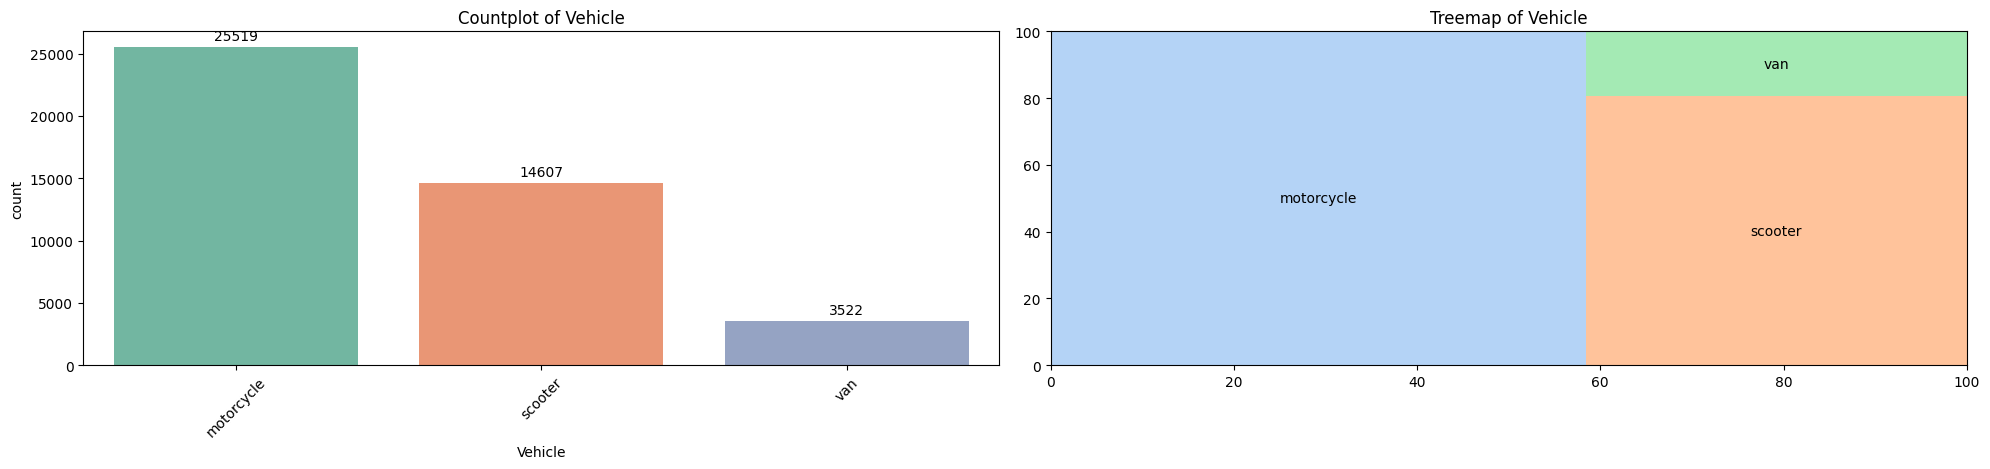

In [211]:
plot_feature_distribution(fe_dataset, 'Vehicle')

***Traffic***

- Deliveries occur under diverse traffic conditions: Low traffic (14,999 orders, ~34%), Traffic Jam (13,725 orders, ~31%), Medium traffic (10,628 orders, ~24%) & High traffic (4,296 orders, ~10%)
- ***Insight:*** Traffic congestion plays an important role, with ~65% of orders happening during low or jammed traffic. Since only 10% fall under “High Traffic,” this category might need careful handling in modeling.`

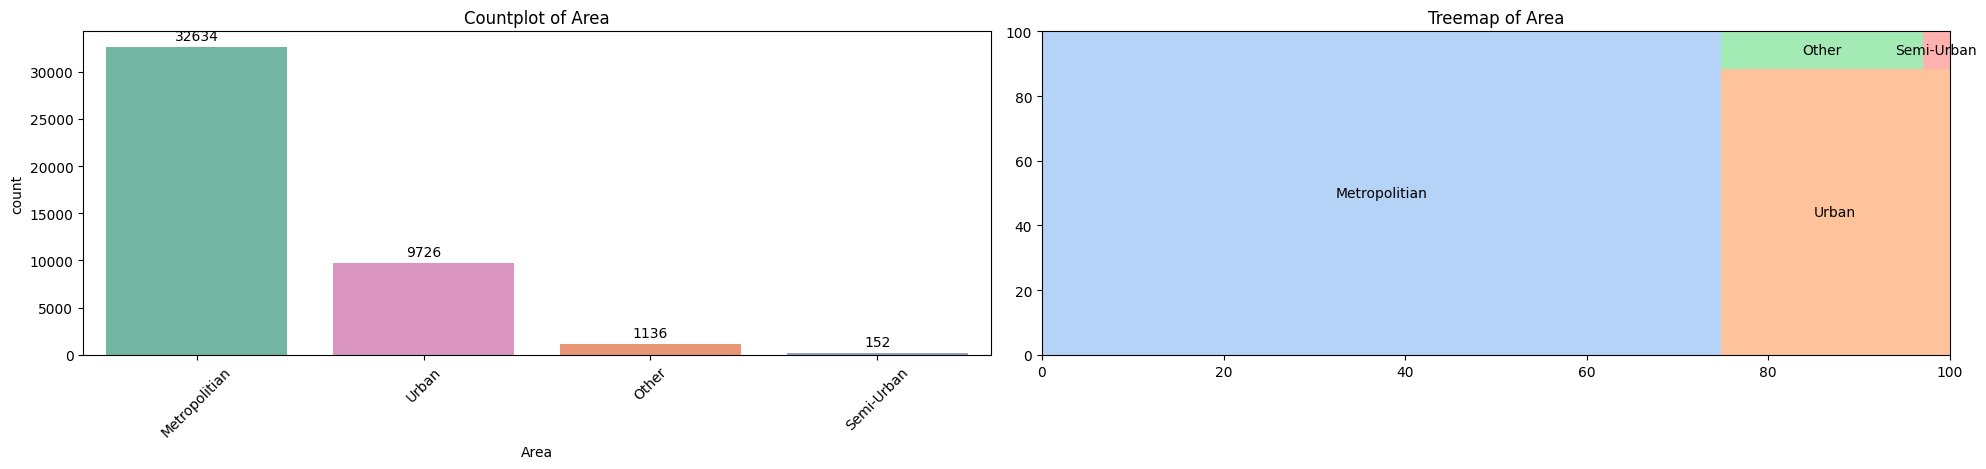

In [212]:
plot_feature_distribution(fe_dataset, 'Area')

***Area***

- The dataset is heavily dominated by deliveries in Metropolitan areas (≈ 32,634 orders, ~75%), followed by Urban areas (≈ 9,726 orders, ~22%). Semi-Urban (152) and Other (1,136) areas together account for less than 3% of the data.
- ***Insight:*** Most deliveries are concentrated in metropolitan and urban regions, so model training will largely learn from these two classes. Minority categories may need balancing if included.

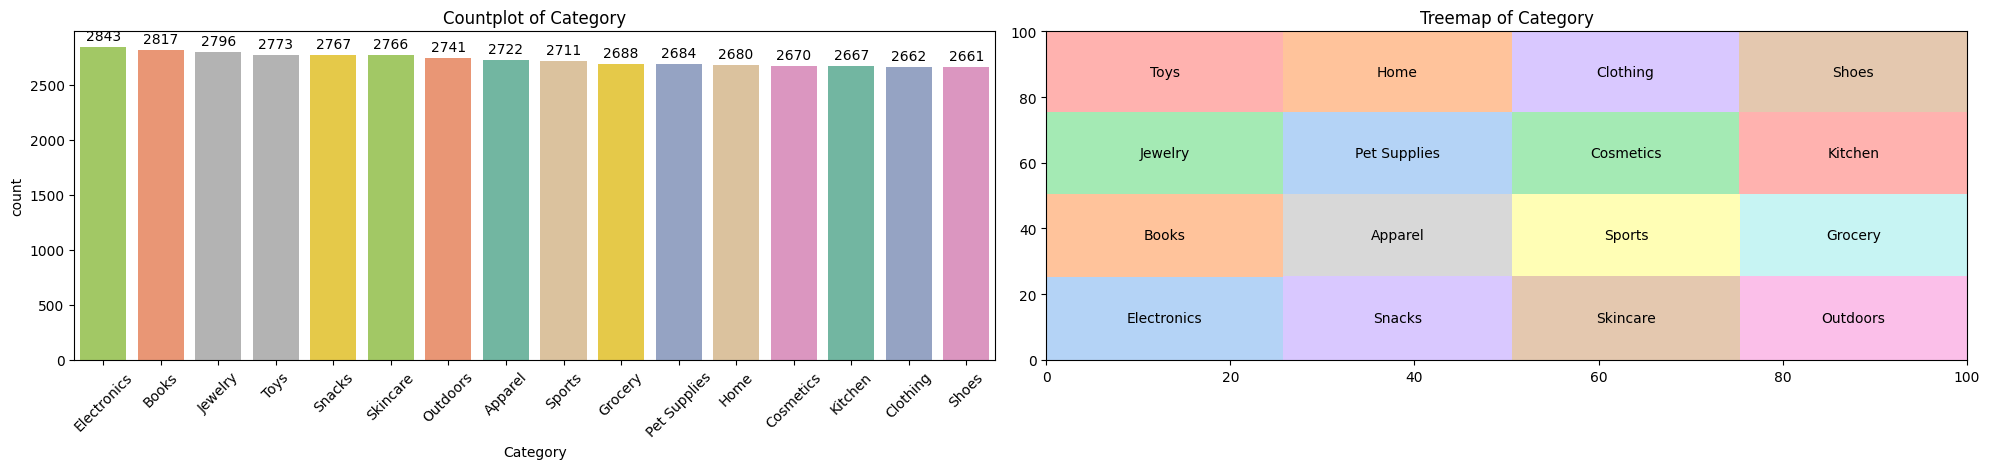

In [213]:
plot_feature_distribution(fe_dataset, 'Category')

***Category***

- The dataset has a wide variety of product categories, all relatively balanced, each having around 2600–2800 deliveries.
- ***Insight:*** This uniform distribution ensures no single product category dominates. The model will treat all categories fairly, reducing bias in category-related patterns.

#### ***Outlier Handling & Skewness Correction***

***As observed from univariate analysis, both Delivery_Time and Distance_km are highly skewed with extreme outliers. To address this:***
- We will cap values at the 0.99 percentile to reduce the impact of extreme cases.
- Next, we will visualize distributions after capping.
- If skewness still persists, we will apply a log transformation (np.log1p) to normalize the distributions.

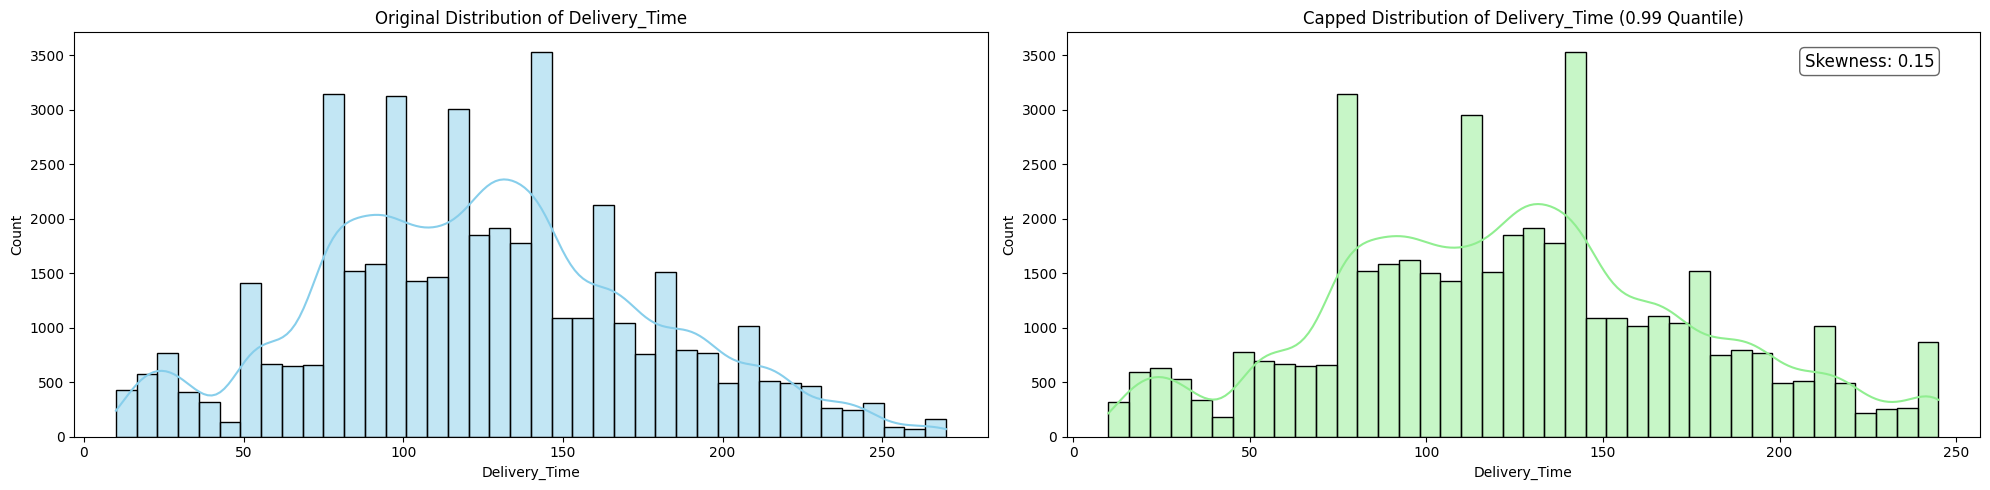

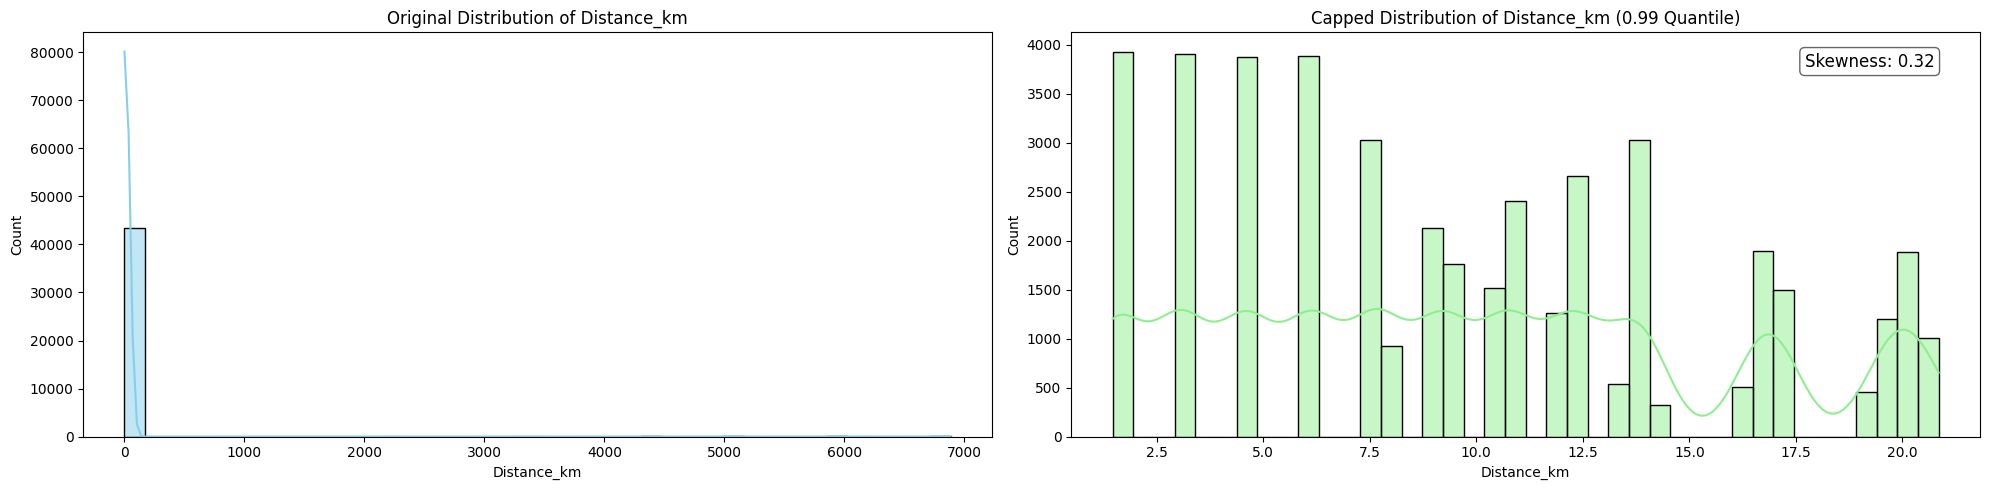

In [214]:
# Columns with outliers/skew
skewed_cols = ["Delivery_Time", "Distance_km"]

for col in skewed_cols:
    # Plot original distribution
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(fe_dataset[col], kde=True, bins=40, color="skyblue", edgecolor="black")
    plt.title(f"Original Distribution of {col}")

    # Cap at 0.99 percentile
    upper_limit = fe_dataset[col].quantile(0.99)
    fe_dataset[col] = np.where(fe_dataset[col] > upper_limit, upper_limit, fe_dataset[col])

    # Skewness after capping
    skew_val = fe_dataset[col].skew()

    # Plot capped distribution with skewness annotation
    plt.subplot(1, 2, 2)
    sns.histplot(fe_dataset[col], kde=True, bins=40, color="lightgreen", edgecolor="black")
    plt.title(f"Capped Distribution of {col} (0.99 Quantile)")
    plt.text(0.95, 0.95, f"Skewness: {skew_val:.2f}", 
             transform=plt.gca().transAxes, 
             ha="right", va="top", fontsize=12, 
             bbox=dict(boxstyle="round", facecolor="white", alpha=0.6))

    plt.tight_layout()
    plt.show()

#### ***Bivariate Analysis***

##### ***Using Scatterplot + Regression Line along with Pearson and Spearman Correlations for Numerical vs Numerical (Target)***

***Reasoning:*** 
- ***Scatterplot*** shows the raw relationship between two continuous variables
- ***Regression Line*** helps visually check if the relationship is linear, weak, or non-linear.
- ***Pearson correlation (r):*** Measures linear correlation between two continuous variables. ***Spearman correlation (ρ):*** Rank-based correlation → measures monotonic relationship (not necessarily linear).
- ***Why both?*** It gives a complete picture:
  - If ***Pearson ≈ Spearman*** → relationship is fairly linear.
  - If ***Pearson ≠ Spearman*** → relationship may be monotonic but not linear
- ***p-values*** = statistical test of significance. The correlation value alone doesn’t tell you if it’s statistically meaningful.
  - ***p-value < 0.05*** → correlation is statistically significant (unlikely due to random chance).
  - ***p-value ≥ 0.05*** → no strong evidence of correlation (could be noise).

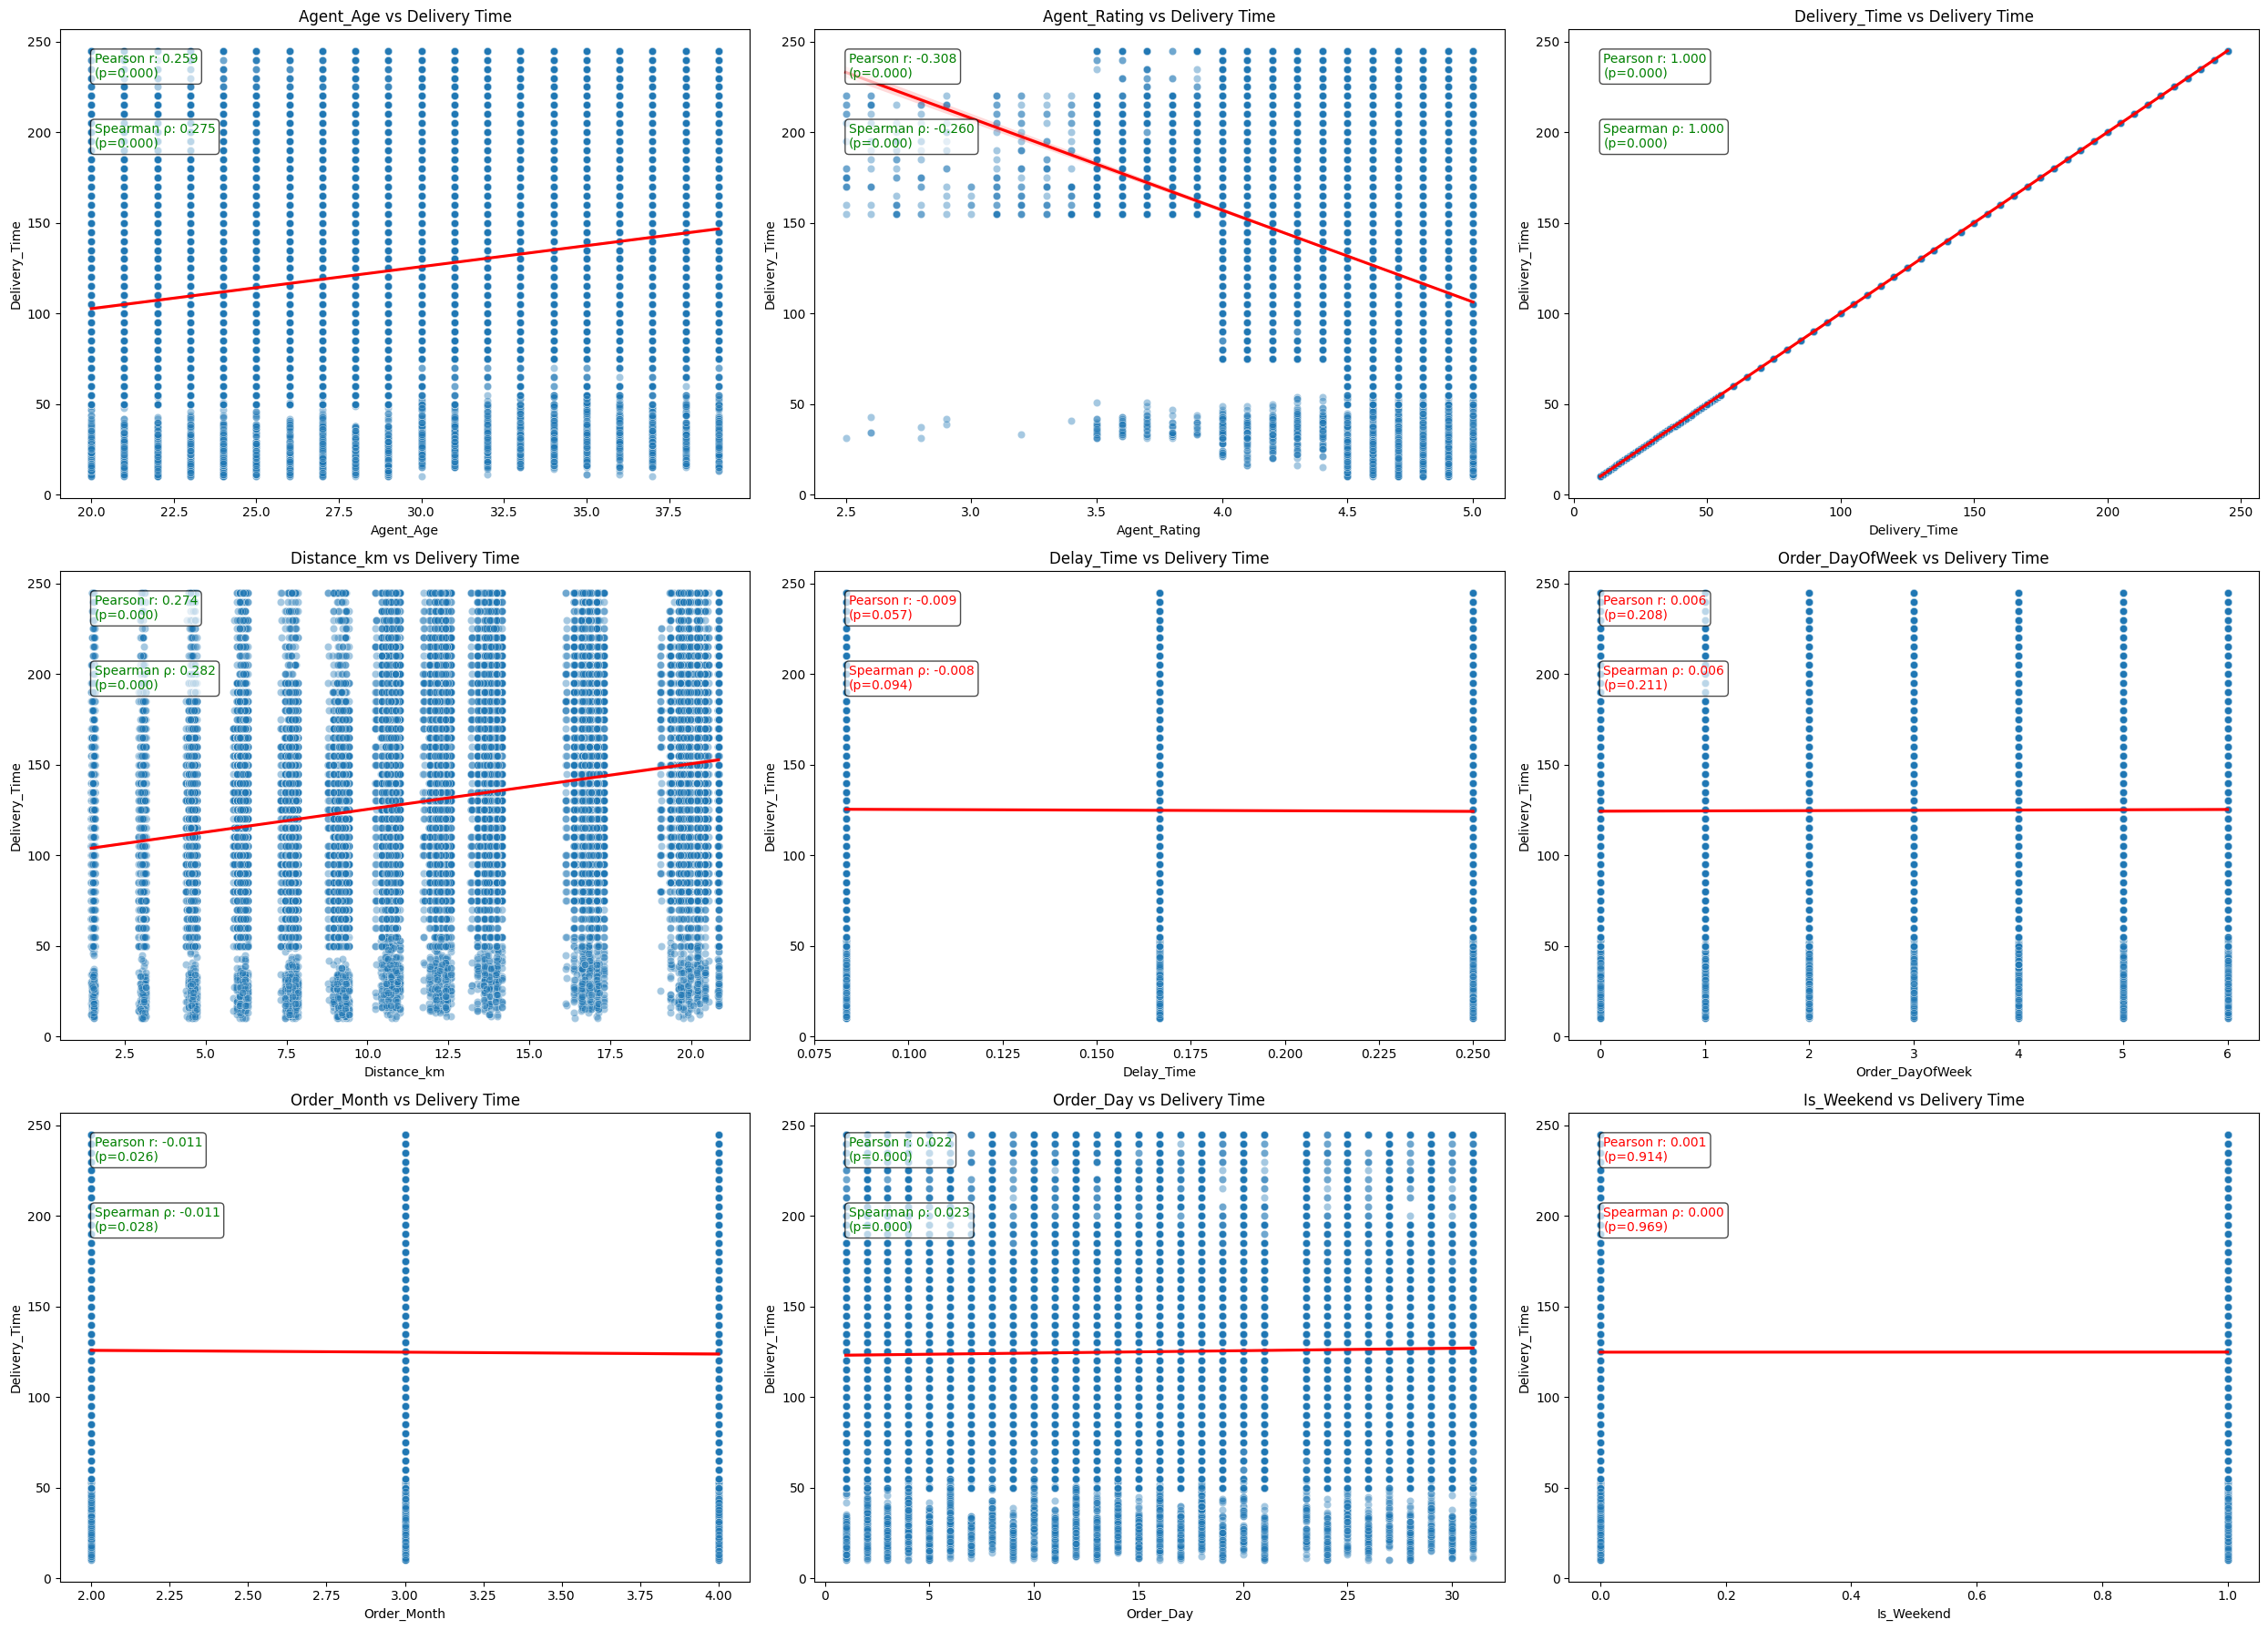

In [215]:
# NUMERICAL vs TARGET (Delivery_Time)
fig, axes = plt.subplots(3, 3, figsize=(25, 18))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    # Scatter + Regression
    sns.scatterplot(x=fe_dataset[col], y=fe_dataset["Delivery_Time"], alpha=0.4, ax=axes[i])
    sns.regplot(x=fe_dataset[col], y=fe_dataset["Delivery_Time"], scatter=False, color="red", ax=axes[i])
    axes[i].set_title(f"{col} vs Delivery Time")

    # Compute correlations
    pear_corr, pear_p = pearsonr(fe_dataset[col], fe_dataset["Delivery_Time"])
    spear_corr, spear_p = spearmanr(fe_dataset[col], fe_dataset["Delivery_Time"])

    # Format annotation
    textstr = (
        f"Pearson r: {pear_corr:.3f} (p={pear_p:.3f})\n"
        f"Spearman ρ: {spear_corr:.3f} (p={spear_p:.3f})"
    )

    # Choose color based on significance
    pear_color = "green" if pear_p < 0.05 else "red"
    spear_color = "green" if spear_p < 0.05 else "red"

    # Annotate on plot
    axes[i].text(0.05, 0.95, f"Pearson r: {pear_corr:.3f}\n(p={pear_p:.3f})",transform=axes[i].transAxes,fontsize=10, 
                    va="top", ha="left",bbox=dict(boxstyle="round", facecolor="white", alpha=0.7),color=pear_color)
    
    axes[i].text(0.05, 0.80, f"Spearman ρ: {spear_corr:.3f}\n(p={spear_p:.3f})",transform=axes[i].transAxes,fontsize=10, 
                    va="top", ha="left",bbox=dict(boxstyle="round", facecolor="white", alpha=0.7),color=spear_color)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Numerical_vs_Target.png"), dpi=300, bbox_inches="tight")
plt.show()

- ***Agent_Rating:***
  - ***Pearson Corr*** = -0.308 (p < 0.05), ***Spearman Corr*** = -0.260 (p < 0.05) 
  - ***Insight:*** Higher-rated agents tend to deliver faster (-ve correlation). Although not a very strong correlation, it is statistically significant. Agent performance (rating) impacts delivery efficiency.

- ***Distance_km:***
  - ***Pearson Corr*** = 0.274 (p < 0.05), ***Spearman Corr*** = 0.282 (p < 0.05) 
  - ***Insight:*** As expected, delivery time increases with distance. The correlation is moderate and significant, confirming distance is an important predictor.

- ***Agent_Age:***
  - ***Pearson Corr*** = 0.259 (p < 0.05), ***Spearman Corr*** = 0.275 (p < 0.05) 
  - ***Insight:*** Older agents are slightly slower in deliveries. While the effect size is small, it’s consistent and significant.

- ***Order_Day:***
  - ***Pearson Corr*** = 0.022 (p < 0.05), ***Spearman Corr*** = 0.023 (p < 0.05)
  - ***Insight:*** Very weak correlation, but statistically significant due to large sample size. Delivery times may show small variations by day of the month but not meaningful.

- ***Order_Month:***
  - ***Pearson Corr*** = -0.011 (p < 0.05), ***Spearman Corr*** = -0.011 (p < 0.05)
  - ***Insight:*** Effect is negligible. Delivery time doesn’t meaningfully vary by month.

- ***Delay_Time:***
  - ***Pearson Corr*** = -0.009 (p = 0.057), ***Spearman Corr*** = -0.008 (p = 0.094)
  - ***Insight:*** No significant correlation. Initial pickup delay doesn’t strongly predict final delivery time — might be capped or normalized already in your data.

- ***Order_DayOfWeek:***
  - ***Pearson Corr*** = 0.006 (p = 0.208), ***Spearman Corr*** = 0.006 (p = 0.211)
  - ***Insight:*** Not significant. Day of the week doesn’t affect delivery time.

- ***Is_Weekend:***
  - ***Pearson Corr*** = 0.001 (p = 0.914), ***Spearman Corr*** = 0.000 (p = 0.969)
  - ***Insight:*** No relationship. Weekend deliveries are no different in timing from weekdays.

##### ***Using Boxplots + ANOVA for Categorical vs Numerical (Target)***
***Reasoning:***
   - ***Boxplots:*** Provide a visual summary of how the numerical target (Delivery_Time) is distributed across different categories.
   - ***ANOVA (Analysis of Variance):*** Provides a statistical test to check if the differences in means of the target variable across categories are statistically significant.
      - Null hypothesis (H₀): The mean delivery times are the same across all groups.
      - Alternative hypothesis (H₁): At least one group has a different mean.
   - ***F-statistic*** measures between-group variance relative to within-group variance.
   - p-***value*** tells us whether differences observed are statistically significant or could be due to chance.

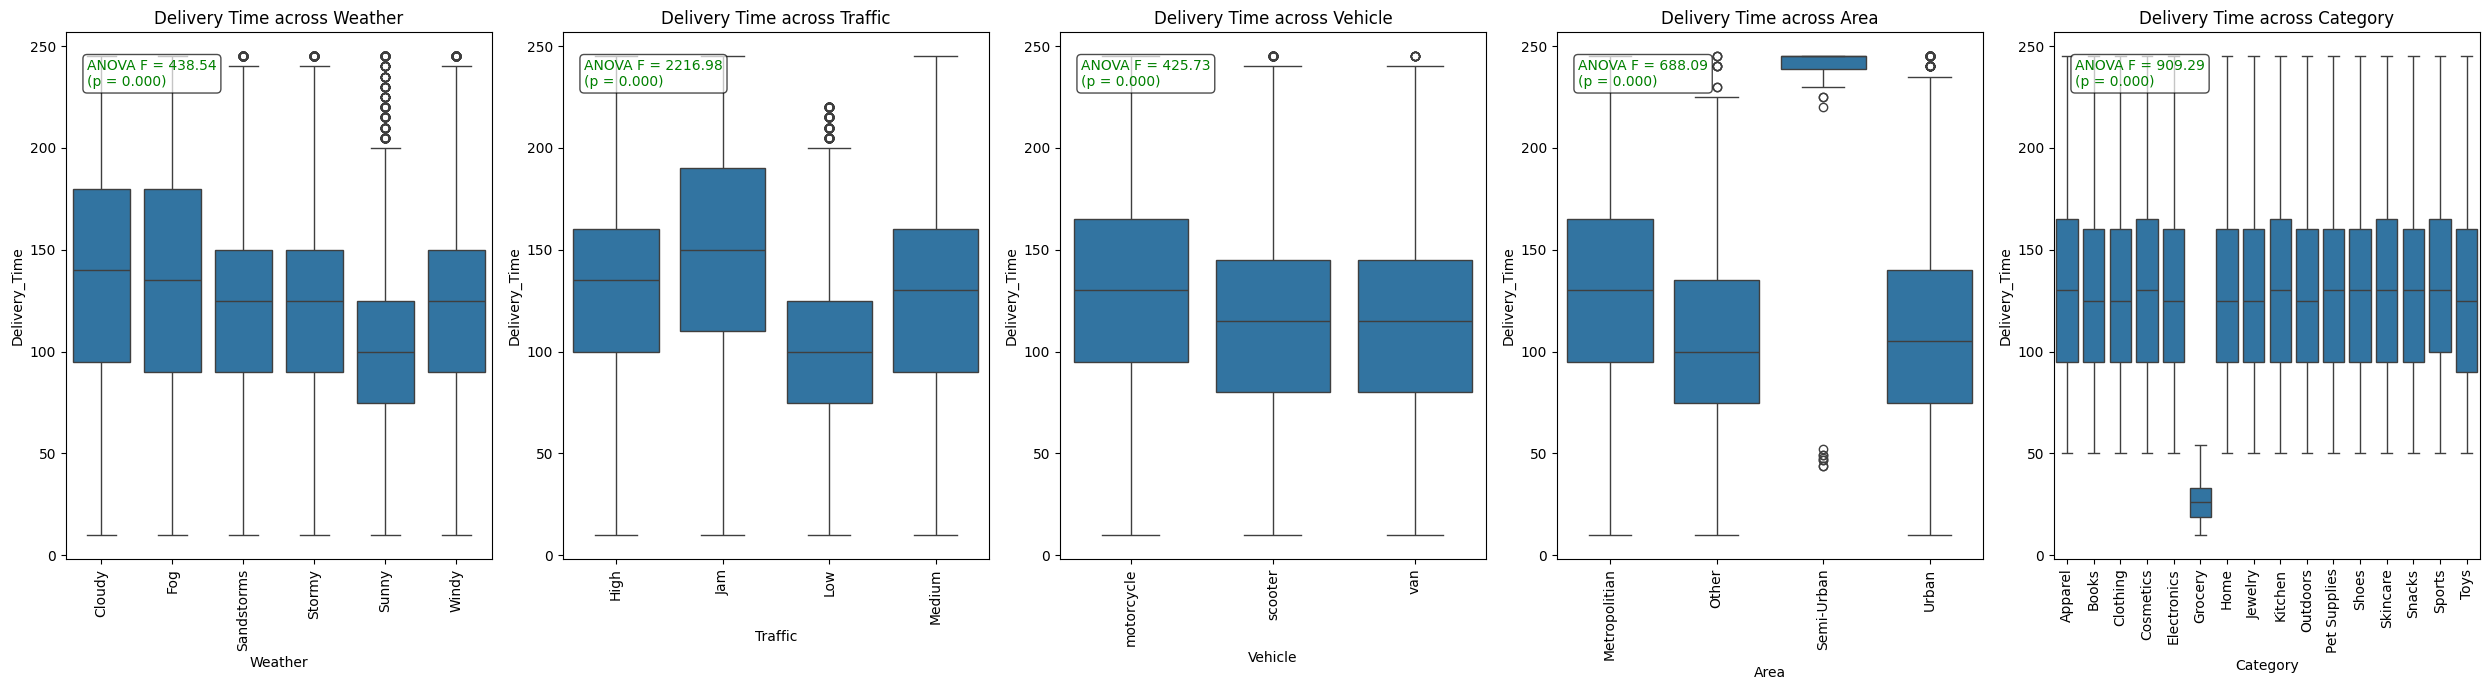

In [216]:
# CATEGORICAL vs TARGET (Delivery_Time) 
fig, axes = plt.subplots(1, 5, figsize=(25, 7))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y="Delivery_Time", data=fe_dataset, ax=axes[i])
    axes[i].set_title(f"Delivery Time across {col}")
    axes[i].tick_params(axis="x", rotation=90)

    # ANOVA test
    groups = [fe_dataset["Delivery_Time"][fe_dataset[col] == level] for level in fe_dataset[col].dropna().unique()]
    f_stat, p_val = f_oneway(*groups)

    # Annotation text
    textstr = f"ANOVA F = {f_stat:.2f}\n(p = {p_val:.3f})"

    # Choose color for significance
    color = "green" if p_val < 0.05 else "red"

    # Add annotation box inside plot
    axes[i].text(0.05, 0.95, textstr, transform=axes[i].transAxes, fontsize=10, va="top", 
                 ha="left", bbox=dict(boxstyle="round", facecolor="white", alpha=0.7), color=color)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Categorical_vs_Target.png"), dpi=300, bbox_inches="tight")
plt.show()

- ***Traffic:***
  - ***ANOVA F*** = 2216.98, p < 0.05
  - ***Insight:*** Traffic conditions strongly impact delivery time. Deliveries during Jam or High traffic are significantly slower compared to Low traffic.

- ***Weather:***
  - ***ANOVA F*** = 438.54, p < 0.05
  - ***Insight:*** Weather conditions affect delivery efficiency. Fog and Cloudy conditions increase delivery time, while Sunny and Windy show relatively faster deliveries.

- ***Area:***
  - ***ANOVA F*** = 688.09, p < 0.05
  - ***Insight:*** Delivery times vary by location type. Semi-Urban areas experience the longest delays, while Urban and Metropolitan areas see relatively faster deliveries.

- ***Category:***
  - ***ANOVA F*** = 909.29, p < 0.05
  - ***Insight:*** Product category influences delivery time. Most categories cluster around similar times, but Grocery stands out with significantly shorter delivery times.

- ***Vehicle:***
  - ***ANOVA F*** = 425.73, p < 0.05
  - ***Insight:*** Vehicle type matters. Motorcycles have longer delivery times on average, while Scooters and Vans show slightly faster deliveries.

#### ***Multivariate Analysis***

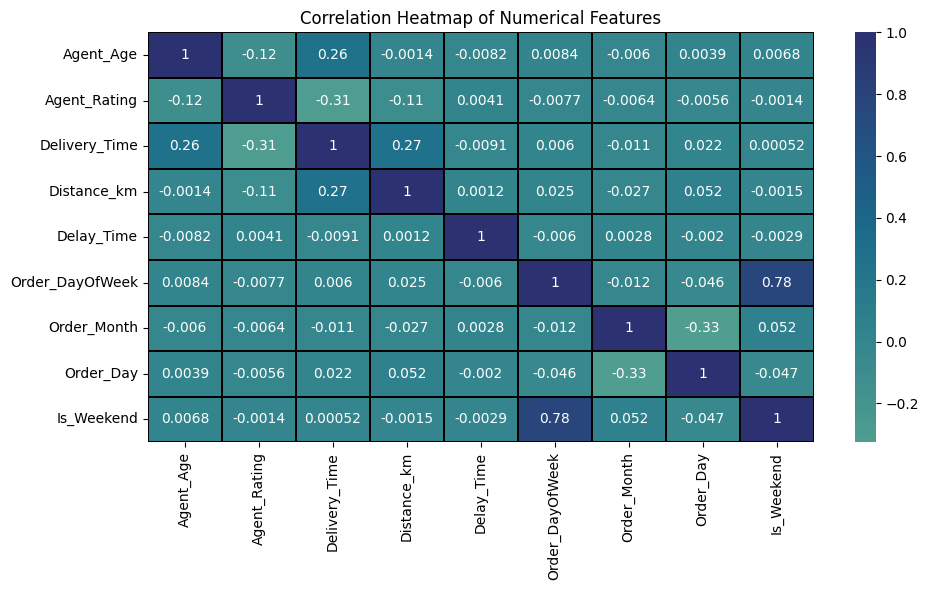

In [217]:
# Correlation Heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(fe_dataset[num_cols].corr(), annot=True, cmap="crest", center=0, linecolor="black", linewidths=0.3)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Heatmap_of_Numerical_features.png"), dpi=300, bbox_inches="tight")
plt.show()

In [218]:
# Chi-Square for every unique pair of categorical columns - used to understand categorical vs categorical relationships
def chi_square_all_pairs(df, cat_cols, alpha=0.05):
    results = []
    for col1, col2 in combinations(cat_cols, 2):  # unique pairs only
        contingency = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = chi2_contingency(contingency)
        results.append({
            "Feature 1": col1,
            "Feature 2": col2,
            "Chi2": chi2,
            "p-value": p,
            "dof": dof,
            "Significant": "✅ Yes" if p < alpha else "❌ No"
        })
    
    results_df = pd.DataFrame(results).sort_values("p-value")
    return results_df

chi_results = chi_square_all_pairs(fe_dataset, cat_cols)
chi_results

,Feature 1,Feature 2,Chi2,p-value,dof,Significant
5,Traffic,Area,533.146787,4.561197e-109,9,✅ Yes
7,Vehicle,Area,128.311325,2.914247e-25,6,✅ Yes
2,Weather,Area,139.471764,2.925735e-22,15,✅ Yes
3,Weather,Category,78.206639,3.773467e-01,75,❌ No
0,Weather,Traffic,14.577813,4.822333e-01,15,❌ No
9,Area,Category,39.736183,6.939379e-01,45,❌ No
4,Traffic,Vehicle,3.347563,7.641277e-01,6,❌ No
8,Vehicle,Category,20.603353,8.998798e-01,30,❌ No
1,Weather,Vehicle,3.958923,9.491810e-01,10,❌ No
6,Traffic,Category,24.264387,9.951072e-01,45,❌ No


***Categorical Feature Associations (Chi-Square Test)***
- ***Traffic ↔ Area*** → Strong association (p < 0.05). Different areas have distinct traffic conditions.
- ***Area ↔ Vehicle*** → Strong association (p < 0.05). Type of vehicle used depends on the delivery area.
- ***Weather ↔ Area*** → Significant (p < 0.05). Certain areas experience specific weather conditions more often.
- Other pairs (e.g., Traffic ↔ Category, Weather ↔ Vehicle) show no significant association (p ≥ 0.05).

***✅ Key Takeaways***

- ***Strongest predictors of Delivery Time:***
  - Distance_km (positive correlation)
  - Agent_Age (slight positive correlation)
  - Agent_Rating (negative correlation)
  - Traffic → High/Jam traffic significantly increases delivery times.
  - Area → Semi-Urban areas face the longest delays compared to Urban/Metropolitan.
  - Category → Grocery deliveries are consistently faster than other product categories.

- ***Moderate predictors:***
  - Weather → Foggy/Cloudy conditions lead to slower deliveries, while Sunny/Windy are relatively faster.
  - Vehicle → Motorcycles show slightly higher delivery times compared to Scooters and Vans, but the effect is weaker than Traffic/Area.  

- ***Negligible / Non-significant predictors:***
  - Delay_Time, Order_Day, Order_Month, Order_DayOfWeek, Is_Weekend

### ***Preprocessing dataset for Modeling***

In [219]:
fe_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43648 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Agent_Age        43648 non-null  int64         
 1   Agent_Rating     43648 non-null  float64       
 2   Weather          43648 non-null  category      
 3   Traffic          43648 non-null  category      
 4   Vehicle          43648 non-null  category      
 5   Area             43648 non-null  category      
 6   Delivery_Time    43648 non-null  float64       
 7   Category         43648 non-null  category      
 8   Distance_km      43648 non-null  float64       
 9   Order_DateTime   43648 non-null  datetime64[ns]
 10  Pickup_DateTime  43648 non-null  datetime64[ns]
 11  Delay_Time       43648 non-null  float64       
 12  Order_DayOfWeek  43648 non-null  int32         
 13  Order_Month      43648 non-null  int32         
 14  Order_Day        43648 non-null  int32     